# **Visualisation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

**Data loading**

In [3]:
df = pd.read_csv('../data/data.csv')

**Severity level categorization function**

In [4]:
def cvss_to_severity(score):
    try:
        score = float(score)
        if score <= 3:
            return 'Faible'
        elif score <= 6:
            return 'Moyenne'
        elif score <= 8:
            return 'Élevée'
        else:
            return 'Critique'
    except:
        return 'Inconnu'

# 1. Histogram of severity levels (based on CVSS)

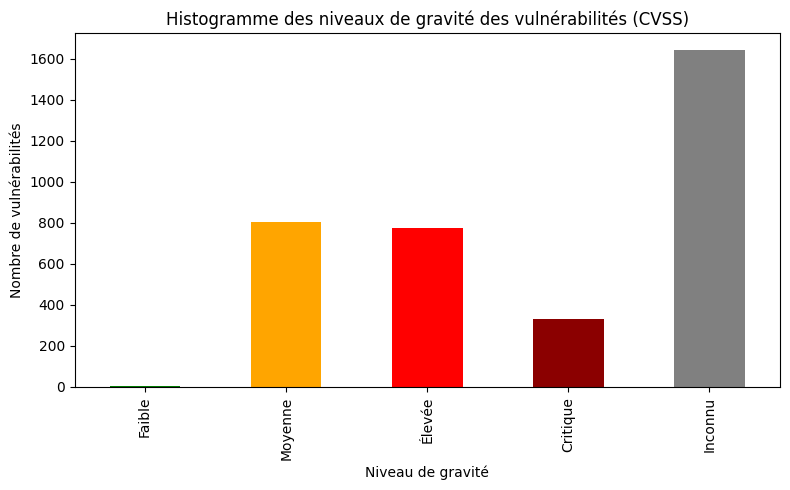

In [6]:
df['Gravité'] = df['CVSS'].apply(cvss_to_severity)
grav_counts = df['Gravité'].value_counts().reindex(['Faible', 'Moyenne', 'Élevée', 'Critique', 'Inconnu'], fill_value=0)

# Plot
plt.figure(figsize=(8,5))
grav_counts.plot(kind='bar', color=['green', 'orange', 'red', 'darkred', 'gray'])
plt.title('Histogramme des niveaux de gravité des vulnérabilités (CVSS)')
plt.xlabel('Niveau de gravité')
plt.ylabel('Nombre de vulnérabilités')
plt.tight_layout()
plt.savefig("../Visualisation/histogramme_gravite.png")
plt.show()

# 2. Circular vulnerability diagram (CWE)

Data cleaning

In [7]:
df['CWE'] = df['CWE'].fillna('Inconnu')

Top 10 most frequents, the other gouped by "Others"

In [ ]:
top_cwe = df['CWE'].value_counts()
top_10 = top_cwe.head(10)
autres = top_cwe[10:].sum()
top_10['Autres'] = autres

Plot

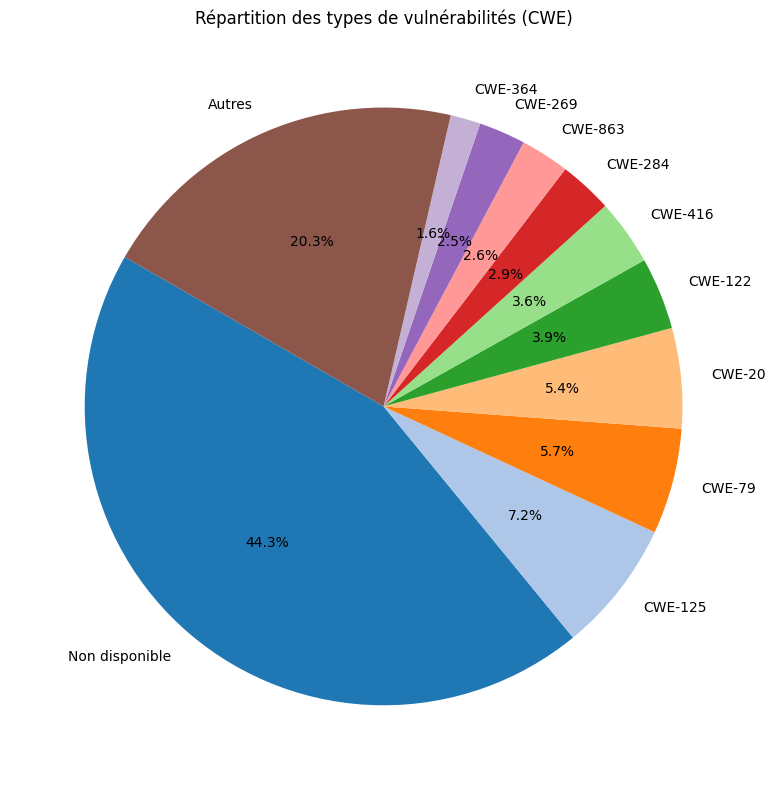

In [16]:
plt.figure(figsize=(8,8))
colors = plt.cm.tab20.colors[:len(top_10)]
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=150, colors=colors)
plt.title('Répartition des types de vulnérabilités (CWE)')
plt.ylabel('')
plt.tight_layout()
plt.savefig("../Visualisation/camembert_CWE.png")
plt.show()

# 3. EPSS Score Density Curve

Ensure EPSS scores are numeric

In [17]:
df['EPSS'] = pd.to_numeric(df['EPSS'], errors='coerce')
epss_valid = df['EPSS'].dropna()

Plot

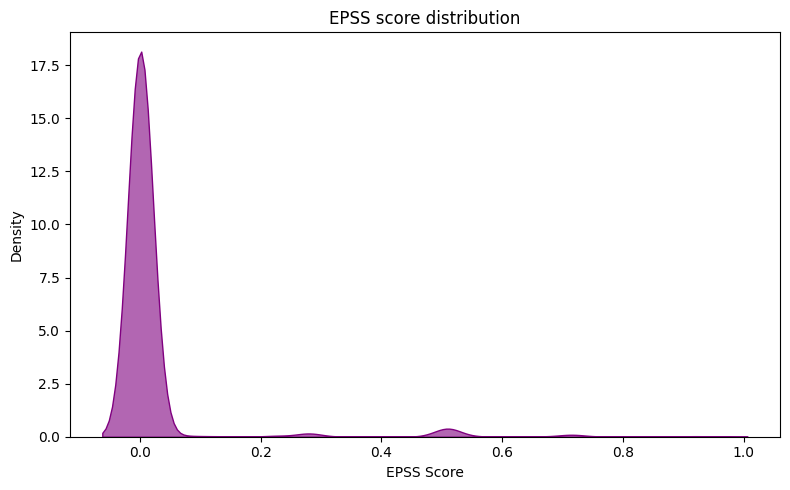

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(epss_valid, fill=True, color="purple", alpha=0.6)
plt.title('EPSS score distribution')
plt.xlabel('EPSS Score')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig("../Visualisation/epss_curve.png")
plt.show()

# 4. Top Affected editors

Count top 10 most frequently affected editors

In [20]:
top_editors = df['Éditeur'].value_counts().head(10)

Plot

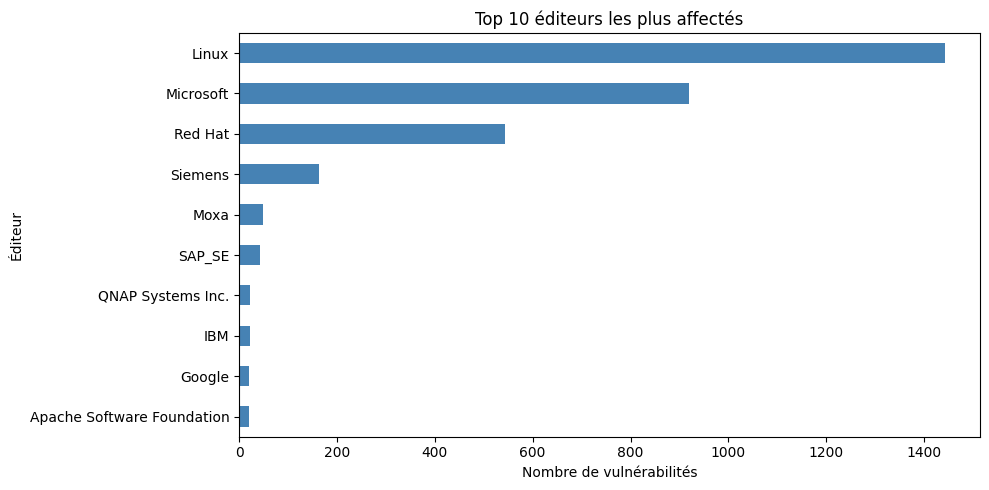

In [21]:
plt.figure(figsize=(10, 5))
top_editors.plot(kind='barh', color='steelblue')
plt.title('Top 10 éditeurs les plus affectés')
plt.xlabel('Nombre de vulnérabilités')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../Visualisation/top_affected_editors.png")
plt.show()

# 5. Top affected products

Count top 10 most frequently affected products

In [22]:
top_products = df['Produit'].value_counts().head(10)

Plot

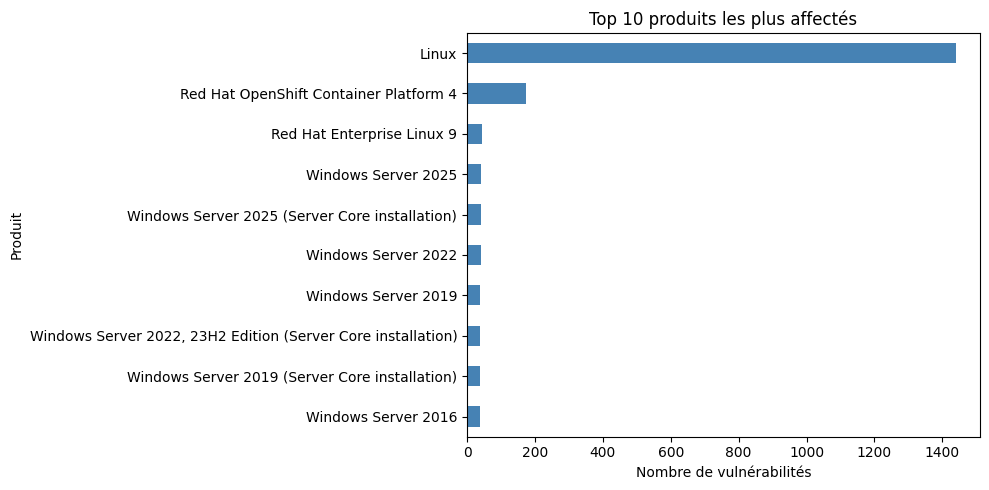

In [24]:
plt.figure(figsize=(10, 5))
top_products.plot(kind='barh', color='steelblue')
plt.title('Top 10 produits les plus affectés')
plt.xlabel('Nombre de vulnérabilités')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../Visualisation/top_affected_products.png")
plt.show()